<a href="https://colab.research.google.com/github/kwenya/hello-world/blob/master/BearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.2 MB/s eta 0:00:00
Mounted at /content/gdrive


In [20]:
from fastbook import *
from fastai.vision.widgets import *

In [21]:
key = os.environ.get('AZURE_SEARCH_KEY', 'f7b515675c604bc8849c7503fdf5e8a6')

In [22]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [23]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

148

In [24]:
ims

(#148) ['https://www.publicdomainpictures.net/pictures/240000/velka/grizzly-bear-portrait-1511961987XRY.jpg','https://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly+Bear+Wildlife.jpg','http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg','https://images.pexels.com/photos/162340/bear-bavarian-bear-wild-brown-bear-162340.jpeg?cs=srgb&dl=animal-bear-cute-162340.jpg&fm=jpg','https://www.expeditionsalaska.com/wp-content/uploads/2017/04/16-brown-bear-photos-2377.jpg','https://www.rwongphoto.com/images/xl/RW6844-2_web.jpg','https://1.bp.blogspot.com/_VgXaDXiFvX4/TOLc83-0DII/AAAAAAAAA9Y/aduLWx2jH7w/s1600/grizzly-bear.jpg','https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg','https://external-preview.redd.it/nhzeQJXHCFc7L0UauxzZgYncU_ijFJsDaE4wLgZYRXc.jpg?auto=webp&s=767fa6c1c6959d27e1b76aa3a2327faea89d9c1c','https://static01.nyt.com/images/2017/06/23/science/23GRIZZLY/23GR

In [25]:
dest = 'images/grizzly.jpg'
download_url(ims[5], dest)

Path('images/grizzly.jpg')

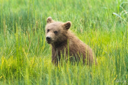

In [26]:
im = Image.open(dest)
im.to_thumb(128,128)

In [27]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [28]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [29]:
fns = get_image_files(path)
fns

(#427) [Path('bears/black/b40e4df5-1639-45f1-be21-b1505062b87f.jpg'),Path('bears/black/fd765054-787f-43d7-bc31-aee88bfa7821.jpg'),Path('bears/black/961988ed-4cbf-4cb7-87b2-444d342fe895.jpg'),Path('bears/black/da0ace17-ff88-4109-97fa-8b85d0886553.jpg'),Path('bears/black/8a196420-0224-4ab4-ab5d-edd712d45416.jpg'),Path('bears/black/06796da9-96ab-43f7-bef4-d776cf1a63f0.jpg'),Path('bears/black/bbfb4b3b-c80f-4e20-9b5d-d6e9b4dc51bd.jpg'),Path('bears/black/d71abd6a-07eb-4380-b69c-a00b55e302dc.jpg'),Path('bears/black/c9a140a0-5e1b-4204-aa71-7bf5bb975c9d.jpg'),Path('bears/black/f9b9dd83-8811-4feb-b654-4c69668d4408.jpg')...]

In [30]:
failed = verify_images(fns)
fns

(#427) [Path('bears/black/b40e4df5-1639-45f1-be21-b1505062b87f.jpg'),Path('bears/black/fd765054-787f-43d7-bc31-aee88bfa7821.jpg'),Path('bears/black/961988ed-4cbf-4cb7-87b2-444d342fe895.jpg'),Path('bears/black/da0ace17-ff88-4109-97fa-8b85d0886553.jpg'),Path('bears/black/8a196420-0224-4ab4-ab5d-edd712d45416.jpg'),Path('bears/black/06796da9-96ab-43f7-bef4-d776cf1a63f0.jpg'),Path('bears/black/bbfb4b3b-c80f-4e20-9b5d-d6e9b4dc51bd.jpg'),Path('bears/black/d71abd6a-07eb-4380-b69c-a00b55e302dc.jpg'),Path('bears/black/c9a140a0-5e1b-4204-aa71-7bf5bb975c9d.jpg'),Path('bears/black/f9b9dd83-8811-4feb-b654-4c69668d4408.jpg')...]

In [31]:
failed.map(Path.unlink)

(#6) [None,None,None,None,None,None]

In [32]:
failed

(#6) [Path('bears/black/7100202c-0fc8-4fad-b7fc-4c6e33720fda.jpg'),Path('bears/teddy/e33e17f4-1274-4011-993d-ab9e59862d4b.jpg'),Path('bears/teddy/00d687d2-0ded-4a5c-938e-21bfc2a3fba8.png'),Path('bears/teddy/213c26c3-b217-4cb2-bed8-745b5c021307.JPG'),Path('bears/grizzly/307efa95-47ae-4c35-9815-0d8eb23f622d.jpg'),Path('bears/grizzly/420c979b-60ca-4db1-af93-16c4406bd252.jpg')]

In [33]:
?? verify_images

In [34]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [35]:
dls = bears.dataloaders(path)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


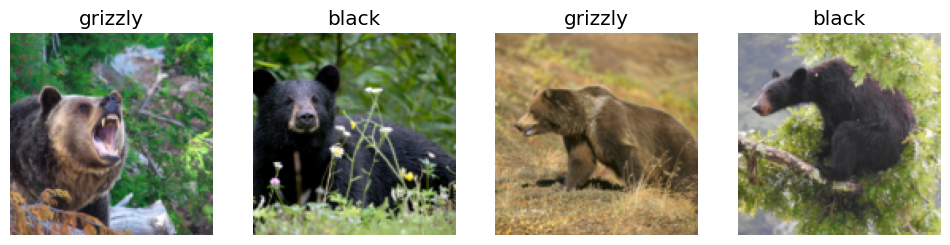

In [36]:
dls.valid.show_batch(max_n=4, nrows=1)


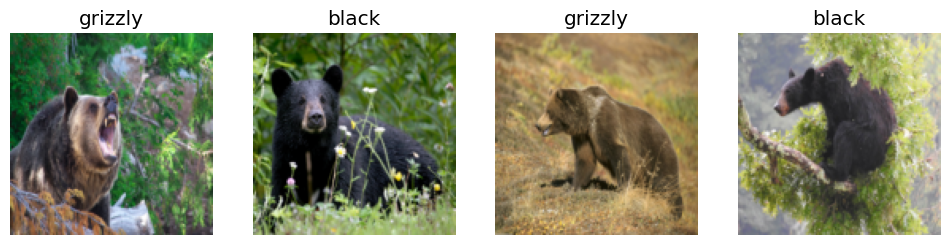

In [37]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

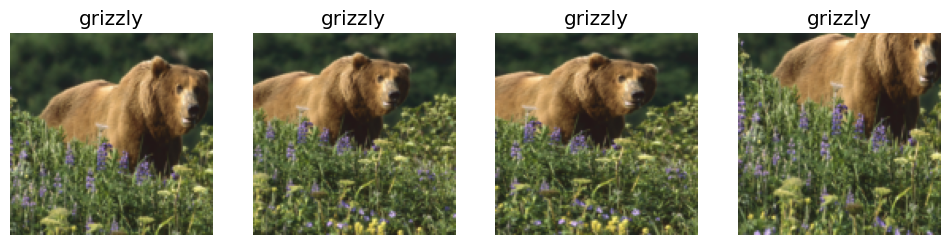

In [38]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

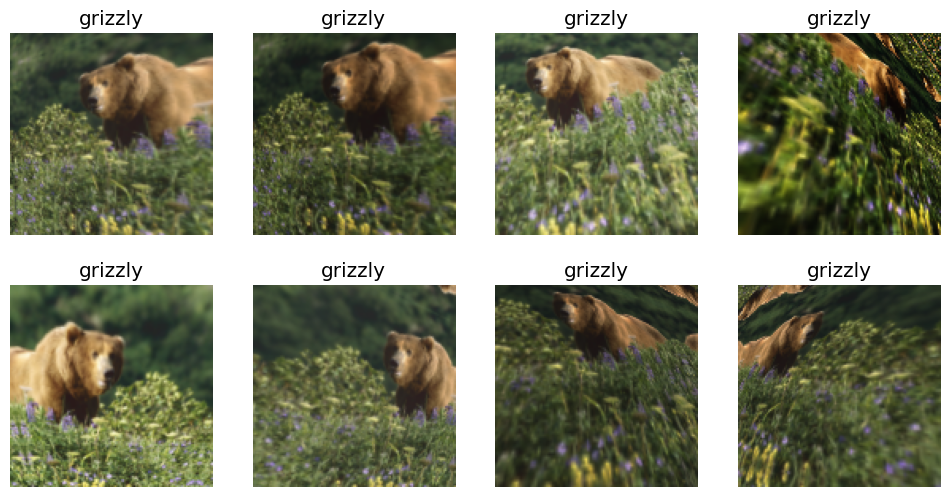

In [39]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [40]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [41]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 161MB/s]


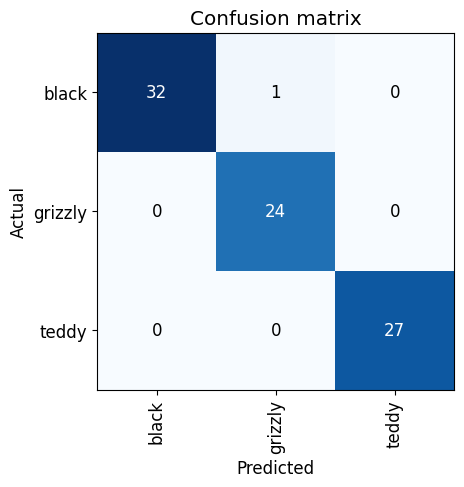

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

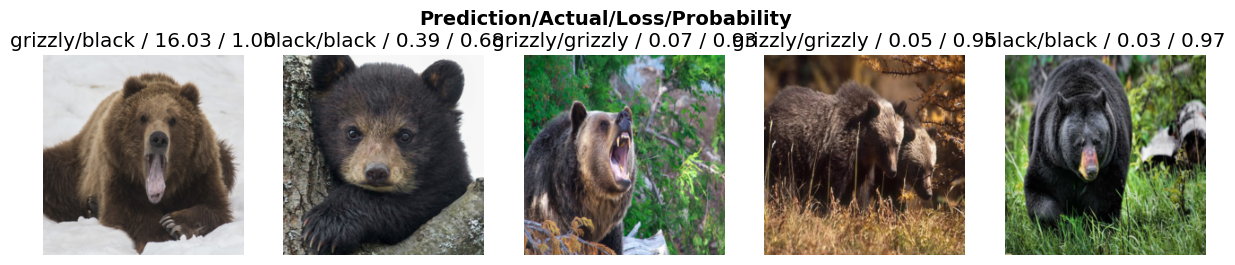

In [43]:
interp.plot_top_losses(5, nrows=1)

In [45]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [46]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [47]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [48]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [49]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

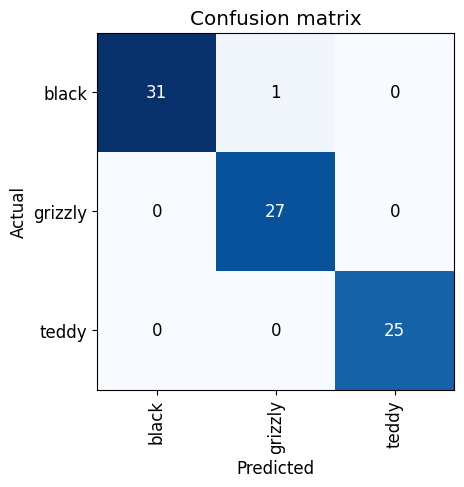

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [51]:
learn.export()

In [52]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [53]:
learn_inf = load_learner(path/'export.pkl')

In [54]:
learn_inf.predict('images/grizzly.jpg')

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


('grizzly', tensor(1), tensor([2.7504e-06, 9.9999e-01, 6.6632e-06]))

In [55]:
learn_inf.predict('images/mybear.jpeg')

('teddy', tensor(2), tensor([2.0113e-04, 2.5243e-07, 9.9980e-01]))

In [56]:
learn_inf.predict('images/mybear2.jpeg')

('black', tensor(0), tensor([9.9801e-01, 1.9184e-03, 7.0130e-05]))

In [57]:
learn_inf.predict('images/mybear3.jpeg')

('grizzly', tensor(1), tensor([3.7743e-07, 1.0000e+00, 3.9990e-08]))

In [58]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [59]:
import ipywidgets as widgets
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [60]:
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [61]:
img = PILImage.create(btn_upload.data[-1])

In [62]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [63]:
pred,pred_idx,probs = learn_inf.predict(img)

In [64]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [65]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [66]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [67]:
btn_upload = widgets.FileUpload()

In [69]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])